In [1]:
# Import data
import pandas as pd
df = pd.read_csv('2012Data2013Returns.csv', encoding='windows-1252')
amzn = df

In [2]:
# Clean data and split into necessary subcomponents
amzn = amzn.dropna()
amzn = amzn.replace('#VALUE!',0)

withoutTickers = amzn.loc[:, amzn.columns != 'Ticker (all values in $ billions)']
tickers = amzn['Ticker (all values in $ billions)']
#withoutMarketCap = withoutTickers.loc[:, withoutTickers.columns != 'Market Capitalization FY 2013']
withoutMarketCapGrowth = withoutTickers.loc[:, withoutTickers.columns != 'Market Capitalization Growth %, YoY FY 2013']

# Remove spaces and additional characters
withoutTickers.columns = withoutTickers.columns.str.strip()
withoutTickers.columns = withoutTickers.columns.str.replace(' ', '')
withoutTickers.columns = withoutTickers.columns.str.replace(',', '')
withoutTickers.columns = withoutTickers.columns.str.replace('_', '')
withoutTickers.columns = withoutTickers.columns.str.replace('+', '')
withoutTickers.columns = withoutTickers.columns.str.replace('-', '')
withoutTickers.columns = withoutTickers.columns.str.replace('%', '')
withoutTickers.columns = withoutTickers.columns.str.replace('/', '')
withoutTickers.columns = withoutTickers.columns.str.replace('&', '')
withoutTickers.columns = withoutTickers.columns.str.replace('(', '')
withoutTickers.columns = withoutTickers.columns.str.replace("'", "")
withoutTickers.columns = withoutTickers.columns.str.replace(')', '')
withoutTickers.columns = withoutTickers.columns.str.replace('—', '')
# This needs to be converted to market cap eventually
withoutTickers.columns

Index(['MarketCapitalizationGrowthYoYFY2013', 'SP500GrowthYoYFY2013',
       'RelativePerformancetoSP500', 'CashEquivalentsFY2012',
       'CashEquivalentsGrowthYoYFY2012', 'PreferredOtherFY2012',
       'PreferredOtherGrowthYoYFY2012', 'TotalDebtFY2012',
       'TotalDebtGrowthYoYFY2012', 'NetDebttoEBITDAFY2012',
       'EnterpriseValueFY2012', 'EnterpriseValuetoRevenueFY2012',
       'EnterpriseValuetoEBITDAFY2012', 'EnterpriseValuetoFreeCashFlowFY2012',
       'EnterpriseValueGrowthYoYFY2012', 'RevenueAdjFY2012',
       'RevenueGrowthYoYFY2012', 'GrossProfitAdjFY2012', 'GrossMarginFY2012',
       'EBITDAAdjFY2012', 'EBITDAMarginFY2012', 'EBITDAGrowthYoYFY2012',
       'NetIncomeAdjFY2012', 'NetIncomeMarginFY2012',
       'NetIncomeGrowthYoYFY2012', 'EPSAdjFY2012', 'EPSGrowthYoYFY2012',
       'CashfromOperationsFY2012', 'CashfromOperationsGrowthYoYFY2012',
       'CapitalExpendituresFY2012', 'CapitalExpendituresGrowthYoYFY2012',
       'FreeCashFlowFY2012', 'FreeCashFlowGrowthYoYFY2

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


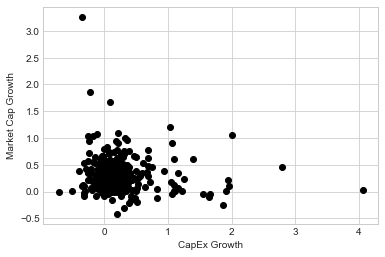

In [3]:
#withoutMarketCap.dtypes

withoutTickers = withoutTickers.convert_objects(convert_numeric=True)
# until converting occurs just use the floating variables
# the object variables are also the ones that are regressing strangely and were filtered out
# once this issue is fixed, we can actually run regressions on all values in this dataset
withoutTickers.dtypes

withoutTickers['CapitalExpendituresGrowthYoYFY2012'].plot()
withoutTickers['CapitalExpendituresGrowthYoYFY2012'].mean()
withoutTickers['CapitalExpendituresGrowthYoYFY2012']
withoutTickers[withoutTickers['CapitalExpendituresGrowthYoYFY2012'] < withoutTickers['CapitalExpendituresGrowthYoYFY2012'].quantile(.95)]

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x = withoutTickers['CapitalExpendituresGrowthYoYFY2012']
y = withoutTickers['MarketCapitalizationGrowthYoYFY2013']

plt.ylabel('Market Cap Growth')
plt.xlabel('CapEx Growth')
plt.plot(x, y, 'o', color='black');
plt.show()

In [4]:
# Regress each feature against returns to see what is statistically significant
# Machine learning textbook: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

import statsmodels.formula.api as smf 
columnNames = [withoutTickers.columns]

w, h = 3, len(withoutTickers.columns);
allMarketStats = [[0 for x in range(w)] for y in range(h)] 

for x in range(len(withoutTickers.columns)):
    #print(columnNames[0][x])
    name = columnNames[0][x]
    allMarketStats[x][0] = name
    value = withoutTickers[name]
    regression = smf.ols(formula = 'MarketCapitalizationGrowthYoYFY2013 ~ value', data=withoutTickers).fit()       
    allMarketStats[x][1] = float(regression.pvalues.value)
    #print(regression.pvalues.value)
    allMarketStats[x][2] = regression.rsquared_adj
    #print(regression.rsquared_adj)

In [5]:
# Which of the regressed values were actually significant in this case? 
statSigAllMarketStats = []

for x in range(len(allMarketStats)):
    check = allMarketStats[x][1]
    if check < .05:
        statSigAllMarketStats.append(allMarketStats[x])

statSigAllMarketStats

[['MarketCapitalizationGrowthYoYFY2013', 0.0, 1.0],
 ['SP500GrowthYoYFY2013', 7.26363871938158e-45, 2.220446049250313e-16],
 ['RelativePerformancetoSP500', 0.0, 1.0],
 ['NetDebttoEBITDAFY2012', 2.8904072796780976e-05, 0.05322978703151482],
 ['EnterpriseValueFY2012', 0.0140951921377513, 0.01654309943480259],
 ['EnterpriseValuetoRevenueFY2012',
  0.017820449179140885,
  0.015196769134513066],
 ['EnterpriseValuetoEBITDAFY2012', 0.01023618490042249, 0.018391299180144705],
 ['GrossProfitAdjFY2012', 0.014547053345841304, 0.01856092123921904],
 ['EBITDAAdjFY2012', 0.01227453619411925, 0.017340608431198556],
 ['EBITDAMarginFY2012', 0.0054570895161750125, 0.022057050956937885],
 ['NetIncomeAdjFY2012', 0.03108787736559276, 0.012037712864884753],
 ['CashfromOperationsFY2012', 0.023656272756513868, 0.013581698624800631],
 ['CapitalExpendituresFY2012', 0.004771986083280135, 0.022843341700324205],
 ['CapitalExpendituresGrowthYoYFY2012',
  0.040428280083779314,
  0.010567681316794197],
 ['Sustainable

In [6]:
beatMarket = withoutTickers[withoutTickers['RelativePerformancetoSP500'] > 0] 

w, h = 3, len(withoutTickers.columns);
beatMarketStats = [[0 for x in range(w)] for y in range(h)] 

for x in range(len(withoutTickers.columns)):
    #print(columnNames[0][x])
    name = columnNames[0][x]
    beatMarketStats[x][0] = name
    value = beatMarket[name]
    regression = smf.ols(formula = 'MarketCapitalizationGrowthYoYFY2013 ~ value', data=beatMarket).fit()       
    beatMarketStats[x][1] = float(regression.pvalues.value)
    #print(regression.pvalues.value)
    beatMarketStats[x][2] = regression.rsquared_adj
    #print(regression.rsquared_adj)

# Which of the regressed values were actually significant in this case? 
statSigBeatMarketStats = []

for x in range(len(beatMarketStats)):
    check = beatMarketStats[x][1]
    if check < .05:
        statSigBeatMarketStats.append(beatMarketStats[x])

statSigBeatMarketStats

[['MarketCapitalizationGrowthYoYFY2013', 0.0, 1.0],
 ['SP500GrowthYoYFY2013', 1.9136599832511775e-43, 0.0],
 ['RelativePerformancetoSP500', 0.0, 1.0],
 ['PreferredOtherGrowthYoYFY2012', 0.04041697234153353, 0.022411094084285432],
 ['TotalDebtFY2012', 0.04320488008607833, 0.021630620722666305],
 ['NetDebttoEBITDAFY2012', 0.0034358360999803706, 0.05207262387482137],
 ['EnterpriseValuetoEBITDAFY2012', 0.0071906698973712895, 0.04308372465703092],
 ['CashRatioFY2012', 0.040161530193845586, 0.022804736154146354],
 ['PricetoSalesRatioFY2012', 0.041761905808797885, 0.022027824948001373],
 ['RDExpendituretoNetSalesFY2012', 0.0015259957296986663, 0.06197975696698255],
 ['InterestExpenseFY2012', 0.045766230028525125, 0.020958409529744815],
 ['PriceEarningsRatioPEFY2012', 0.0023531784199278096, 0.056691166011037186],
 ['TotalInvestedCapitalFY2012', 0.04528734438124326, 0.021081064718765585],
 ['EarningsYieldFY2012', 0.010392121888379603, 0.03862165294967157]]

In [7]:
loseMarket = withoutTickers[withoutTickers['RelativePerformancetoSP500'] < 0] 

w, h = 3, len(withoutTickers.columns);
loseMarketStats = [[0 for x in range(w)] for y in range(h)] 

for x in range(len(withoutTickers.columns)):
    #print(columnNames[0][x])
    name = columnNames[0][x]
    loseMarketStats[x][0] = name
    value = withoutTickers[name]
    regression = smf.ols(formula = 'MarketCapitalizationGrowthYoYFY2013 ~ value', data=withoutTickers).fit()       
    loseMarketStats[x][1] = float(regression.pvalues.value)
    #print(regression.pvalues.value)
    loseMarketStats[x][2] = regression.rsquared_adj
    #print(regression.rsquared_adj)

# Which of the regressed values were actually significant in this case? 
statSigLoseMarketStats = []

for x in range(len(loseMarketStats)):
    check = loseMarketStats[x][1]
    if check < .05:
        statSigLoseMarketStats.append(loseMarketStats[x])

statSigLoseMarketStats

[['MarketCapitalizationGrowthYoYFY2013', 0.0, 1.0],
 ['SP500GrowthYoYFY2013', 7.26363871938158e-45, 2.220446049250313e-16],
 ['RelativePerformancetoSP500', 0.0, 1.0],
 ['NetDebttoEBITDAFY2012', 2.8904072796780976e-05, 0.05322978703151482],
 ['EnterpriseValueFY2012', 0.0140951921377513, 0.01654309943480259],
 ['EnterpriseValuetoRevenueFY2012',
  0.017820449179140885,
  0.015196769134513066],
 ['EnterpriseValuetoEBITDAFY2012', 0.01023618490042249, 0.018391299180144705],
 ['GrossProfitAdjFY2012', 0.014547053345841304, 0.01856092123921904],
 ['EBITDAAdjFY2012', 0.01227453619411925, 0.017340608431198556],
 ['EBITDAMarginFY2012', 0.0054570895161750125, 0.022057050956937885],
 ['NetIncomeAdjFY2012', 0.03108787736559276, 0.012037712864884753],
 ['CashfromOperationsFY2012', 0.023656272756513868, 0.013581698624800631],
 ['CapitalExpendituresFY2012', 0.004771986083280135, 0.022843341700324205],
 ['CapitalExpendituresGrowthYoYFY2012',
  0.040428280083779314,
  0.010567681316794197],
 ['Sustainable

In [8]:
# Stats spread between predictive values for beating and underperforming the market. 
w, h = 3, len(beatMarketStats);
marketStatsDelta = [[0 for x in range(w)] for y in range(h)] 

for x in range(len(withoutTickers.columns)):
    marketStatsDelta[x][0] = beatMarketStats[x][0]        
    marketStatsDelta[x][1] = loseMarketStats[x][1] - beatMarketStats[x][1]
    marketStatsDelta[x][2] = loseMarketStats[x][1] - beatMarketStats[x][1]

marketStatsDelta

[['MarketCapitalizationGrowthYoYFY2013', 0.0, 0.0],
 ['SP500GrowthYoYFY2013', -1.8410235960573617e-43, -1.8410235960573617e-43],
 ['RelativePerformancetoSP500', 0.0, 0.0],
 ['CashEquivalentsFY2012', -0.43933414968474716, -0.43933414968474716],
 ['CashEquivalentsGrowthYoYFY2012', -0.2702067593759248, -0.2702067593759248],
 ['PreferredOtherFY2012', 0.1598686389785865, 0.1598686389785865],
 ['PreferredOtherGrowthYoYFY2012', 0.06514442458780079, 0.06514442458780079],
 ['TotalDebtFY2012', 0.04168920782680365, 0.04168920782680365],
 ['TotalDebtGrowthYoYFY2012', -0.5759323267147174, -0.5759323267147174],
 ['NetDebttoEBITDAFY2012', -0.0034069320271835897, -0.0034069320271835897],
 ['EnterpriseValueFY2012', -0.2132509713234915, -0.2132509713234915],
 ['EnterpriseValuetoRevenueFY2012',
  -0.07943489031221591,
  -0.07943489031221591],
 ['EnterpriseValuetoEBITDAFY2012', 0.003045515003051201, 0.003045515003051201],
 ['EnterpriseValuetoFreeCashFlowFY2012',
  0.6250918284292493,
  0.6250918284292493]

CapitalExpendituresFY2012            CashfromOperationsFY2012              -0.837910
TotalDebtFY2012                      PreferredOtherFY2012                  -0.828613
CapitalExpendituresFY2012            EBITDAAdjFY2012                       -0.768429
EnterpriseValueFY2012                CapitalExpendituresFY2012             -0.716956
TotalInvestedCapitalFY2012           CapitalExpendituresFY2012             -0.709716
RevenueAdjFY2012                     CapitalExpendituresFY2012             -0.709079
CapitalExpendituresFY2012            NetIncomeAdjFY2012                    -0.691295
GrossProfitAdjFY2012                 CapitalExpendituresFY2012             -0.687770
FreeCashFlowGrowthYoYFY2012          EBITDAGrowthYoYFY2012                 -0.668351
PricetoSalesRatioFY2012              EarningsYieldFY2012                   -0.566842
CapitalExpendituresFY2012            InterestExpenseFY2012                 -0.561841
EarningsYieldFY2012                  EnterpriseValuetoRevenueFY20

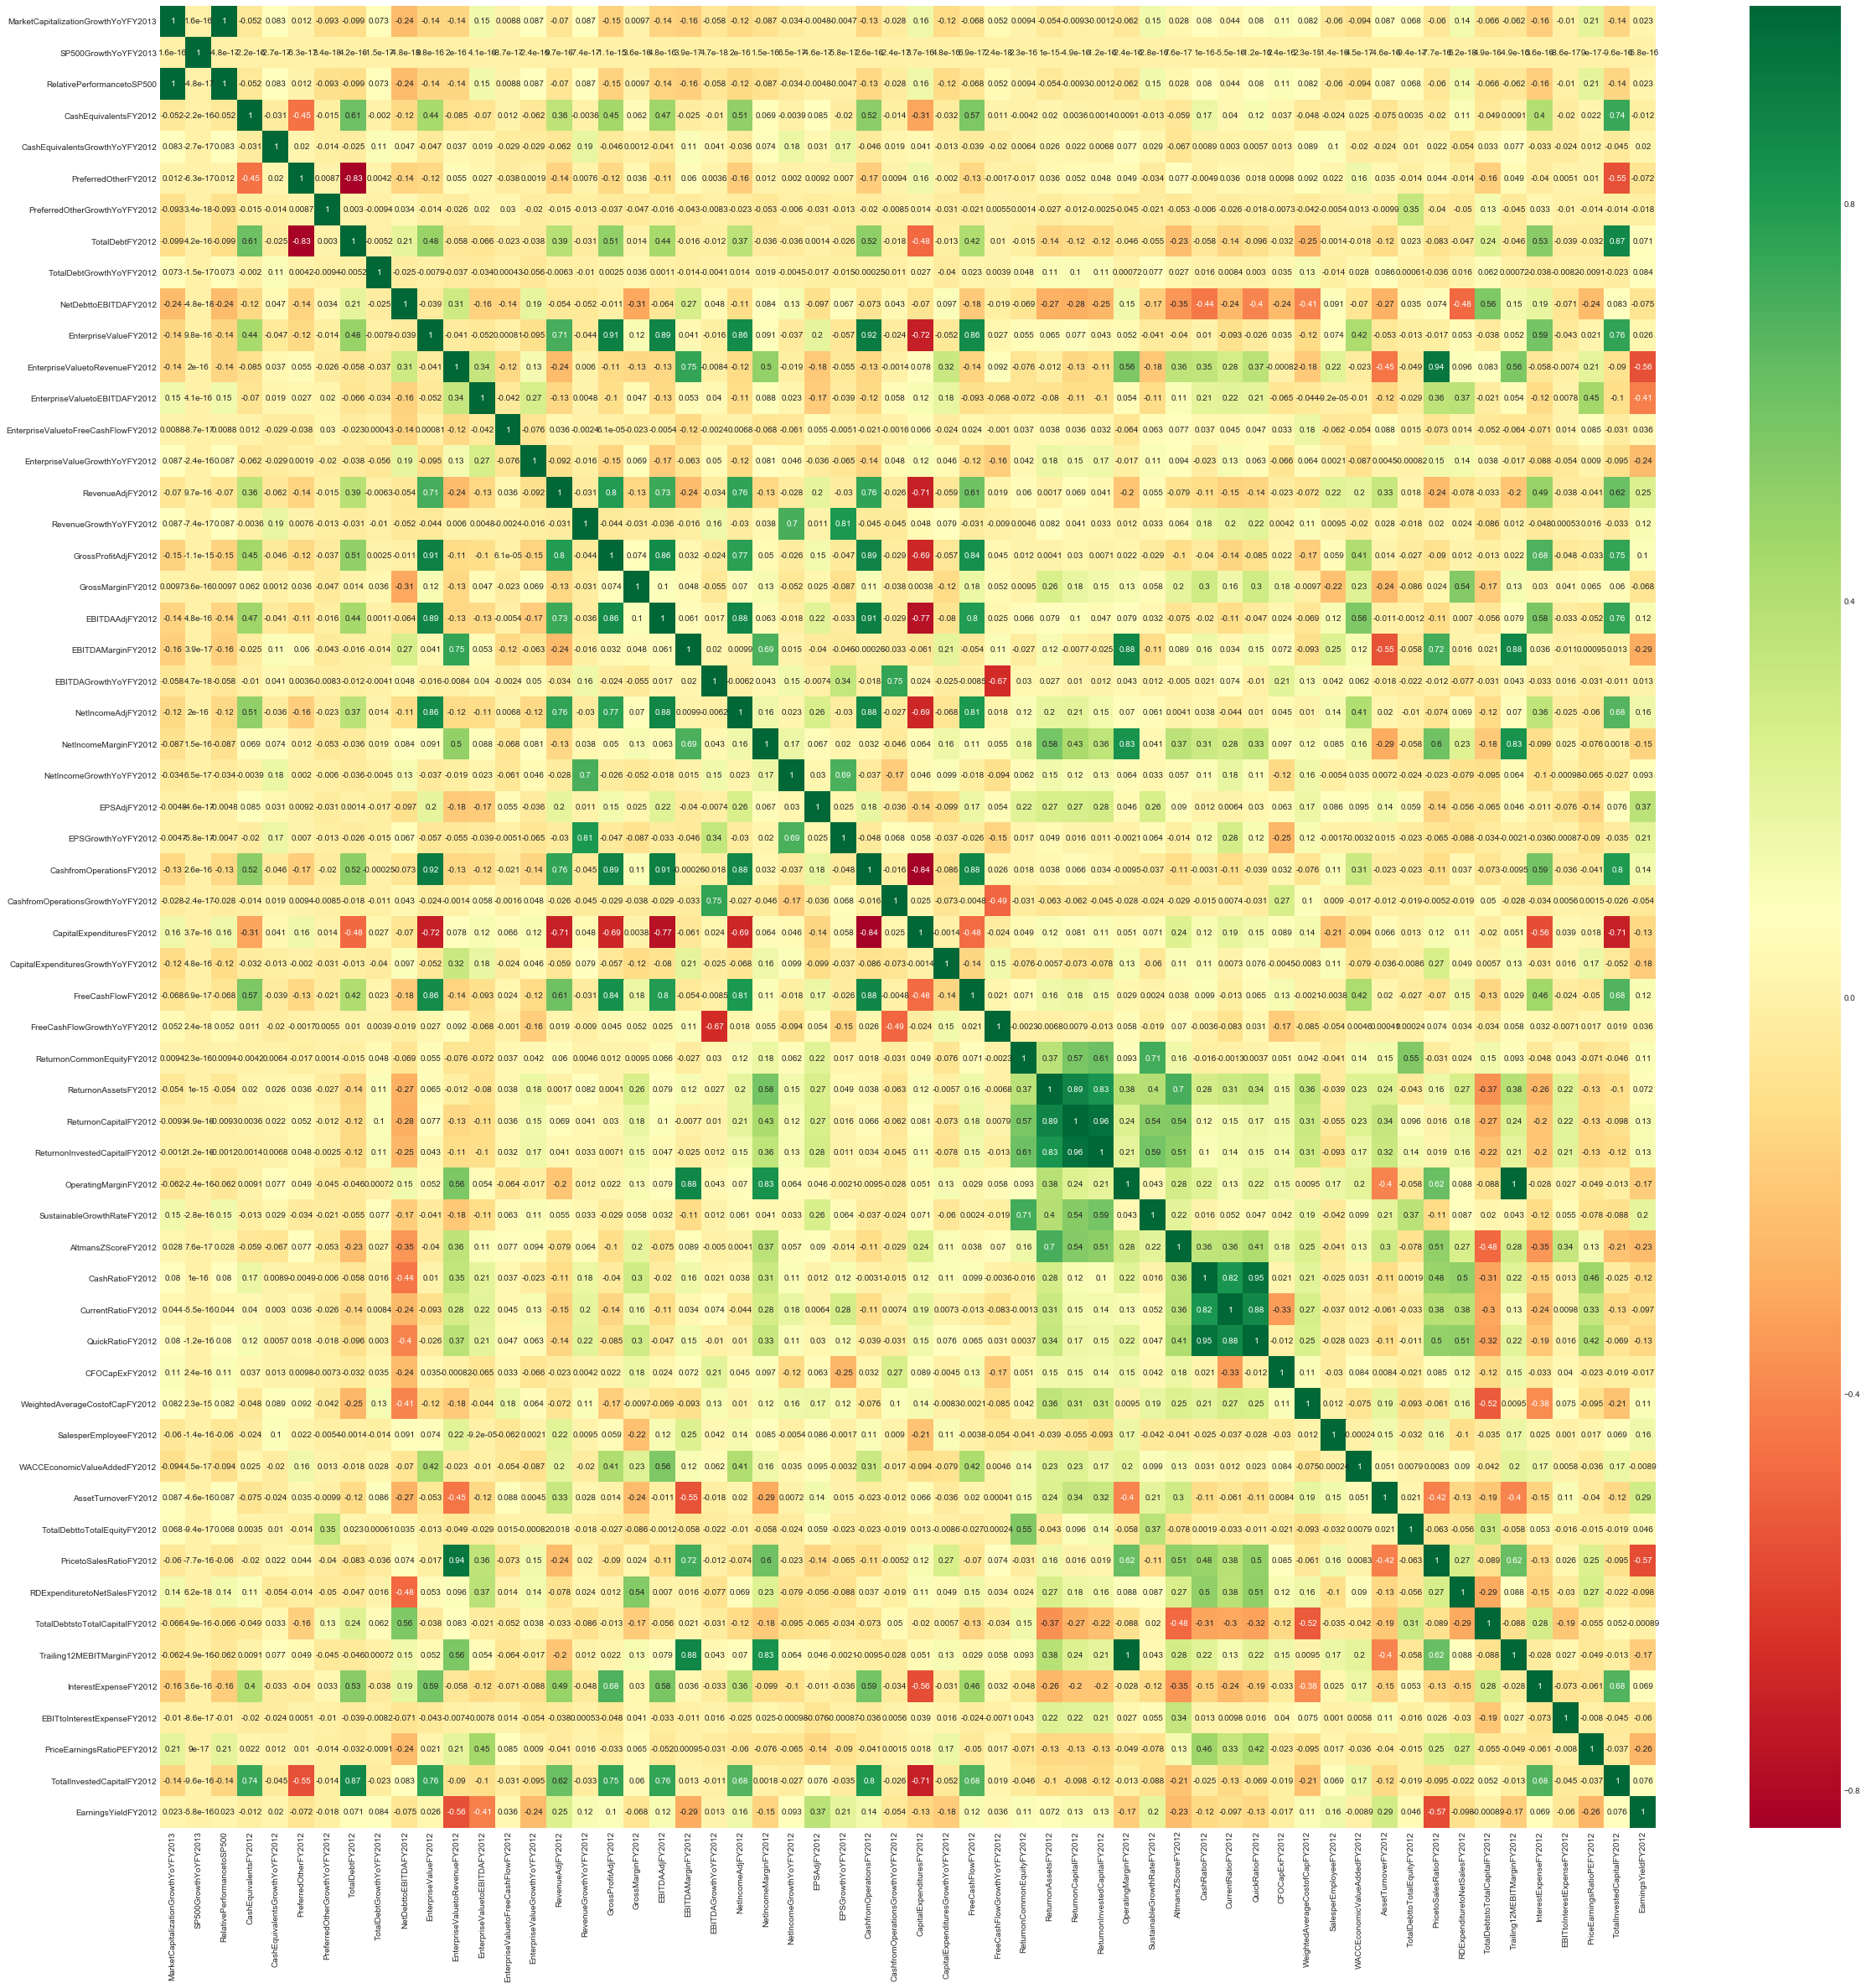

In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns

X = withoutTickers.iloc[:,4:len(withoutTickers)]  #independent columns
y = withoutTickers.iloc[:,1]    #target column i.e Market Cap growth

# Get correlations of each features in dataset
corrmat = withoutTickers.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(withoutTickers[top_corr_features].corr(),annot=True,cmap="RdYlGn")

import pandas as pd
import numpy as np

df = pd.DataFrame(withoutTickers)

allCorrelations = df.corr().unstack().sort_values().drop_duplicates()
allCorrelations

In [20]:
# I think these alll assume positive return
X = withoutTickers.iloc[:,4:len(withoutTickers.columns)]  #independent columns
y = withoutTickers.iloc[:,0]    #target column i.e Market Cap growth
corr = np.corrcoef(y, X, rowvar=False)

corrColumns = pd.DataFrame(X.columns)
corrCorr = pd.DataFrame(corr[0][1:100])

featureToMarketCorrelation = corrCorr.merge(corrColumns, how='outer', left_index=True, right_index=True)
featureToMarketCorrelation

,0_x,0_y
0,0.083384,CashEquivalentsGrowthYoYFY2012
1,NaN,PreferredOtherFY2012
2,-0.093007,PreferredOtherGrowthYoYFY2012
3,-0.098984,TotalDebtFY2012
4,0.073301,TotalDebtGrowthYoYFY2012
5,-0.237391,NetDebttoEBITDAFY2012
6,-0.140673,EnterpriseValueFY2012
7,-0.135820,EnterpriseValuetoRevenueFY2012
8,0.147075,EnterpriseValuetoEBITDAFY2012
9,0.008800,EnterpriseValuetoFreeCashFlowFY2012
